## Developing AI/ML methods for extracting biological insights from large datasets, focusing on computational biology, molecular systems, and interpretable models.

Specifically, the code builds a simple interpretable ML model (Random Forest) to predict protein-ligand binding affinity using molecular features from a mock dataset and explains predictions using SHAP values (for interpretability).


# Predicting Protein-Ligand Binding Affinity with Interpretable Machine Learning

In this notebook, we will:
- Build a machine learning (ML) model to predict synthetic protein-ligand binding affinity
- Use **Random Forests** for regression
- Explain the predictions using **SHAP values** for interpretability

This is a teaching example to introduce students to:
- Computational biology data
- Machine learning modeling
- Interpretable AI tools

---

## Step 1: Import required libraries

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import shap
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

## Step 2: Generate synthetic biological dataset

We simulate 500 samples with 10 molecular features (like hydrophobicity, molecular weight, etc.)
The target variable is a synthetic **binding affinity** value.

In [12]:
np.random.seed(42)
n_samples = 500
n_features = 10

# Simulated features
X = pd.DataFrame(np.random.rand(n_samples, n_features), 
                 columns=[f'feature_{i+1}' for i in range(n_features)])

# Simulated binding affinity (target)
y = X.sum(axis=1) + np.random.normal(0, 0.1, n_samples)

# Display sample data
X.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073
1,0.020584,0.969910,0.832443,0.212339,0.181825,0.183405,0.304242,0.524756,0.431945,0.291229
2,0.611853,0.139494,0.292145,0.366362,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450
3,0.607545,0.170524,0.065052,0.948886,0.965632,0.808397,0.304614,0.097672,0.684233,0.440152
4,0.122038,0.495177,0.034389,0.909320,0.258780,0.662522,0.311711,0.520068,0.546710,0.184854


## Step 3: Split the data into training and test sets

Model RMSE: 0.503
Model R²: 0.707


/var/folders/qh/fmzc9db1783cz_z1bj3znn44y1tlxj/T/ipykernel_66364/2861470747.py:44: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar")


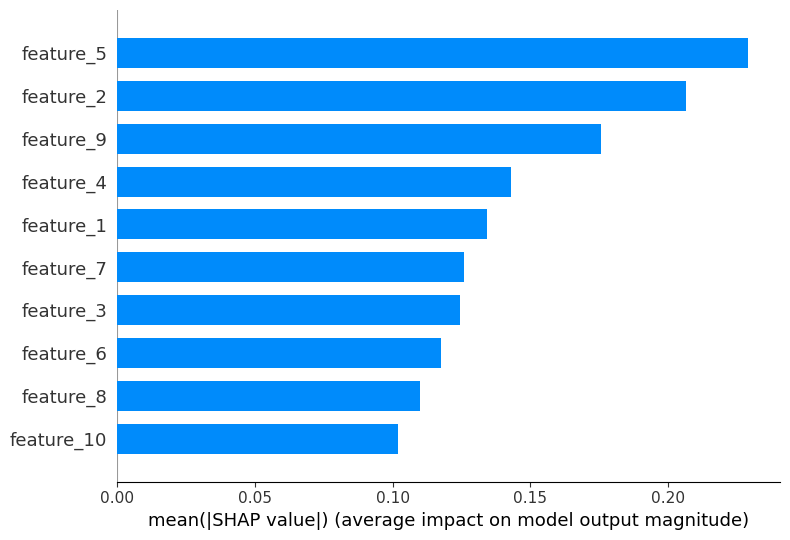

/var/folders/qh/fmzc9db1783cz_z1bj3znn44y1tlxj/T/ipykernel_66364/2861470747.py:45: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


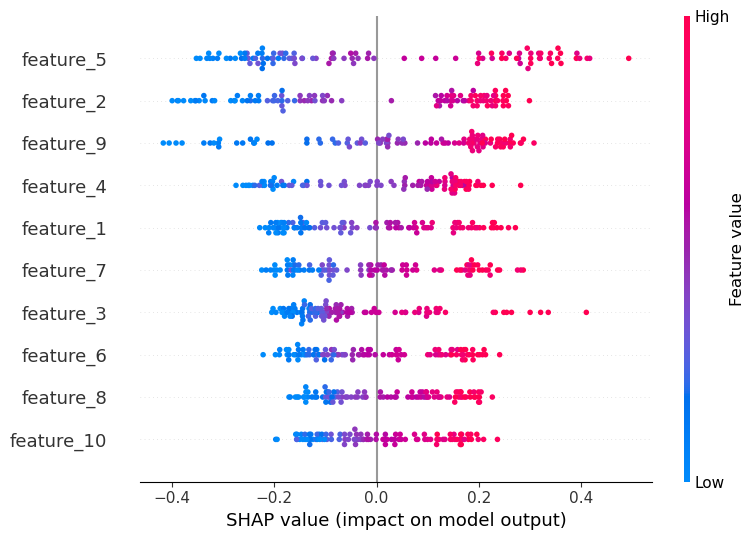

In [1]:
# Showcase code: Predicting protein-ligand binding affinity using ML with interpretable models

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import shap
import matplotlib.pyplot as plt

# Step 1: Generate synthetic biological dataset
# (In real projects, you would load molecular descriptors from experimental data)

np.random.seed(42)
n_samples = 500
n_features = 10

# Example features: hydrophobicity, molecular weight, H-bond donors/acceptors, etc.
X = pd.DataFrame(np.random.rand(n_samples, n_features), 
                 columns=[f'feature_{i+1}' for i in range(n_features)])
# Example target: binding affinity (Kd, Ki, IC50)
y = X.sum(axis=1) + np.random.normal(0, 0.1, n_samples)  # synthetic signal + noise

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train ML model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluate model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Model RMSE: {rmse:.3f}")
print(f"Model R²: {r2:.3f}")

# Step 5: Explain predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Step 6: Visualize feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

# Step 7: Example use: explain a single prediction
sample_idx = 0
shap.force_plot(explainer.expected_value, shap_values[sample_idx, :], X_test.iloc[sample_idx, :])

**Computational biology setting:** synthetic biological dataset (could be replaced with real protein-ligand data)\
**AI/ML modeling:** Random Forest for regression\
**Interpretability:** SHAP explanations and summary plots\
**Teaching value:** clear steps that can be expanded for student projects\
**Research relevance:** scaffold for more advanced models like Graph Neural Networks, Transformers, etc.\
**Communication:** generates visual outputs that are useful for papers and presentations